In [1]:
import numpy as np
import gymnasium
import neurolib.control.reinforcement_learning
import matplotlib.pyplot as plt

In [2]:
env = gymnasium.make('Synchronization-v0')

# Random Agent

In [3]:
observation, info = env.reset()

observations = []
rewards = []
actions = []

while True:
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)
    observations.append(observation)
    rewards.append(reward)
    actions.append(action)
    
    if terminated or truncated:
        observation, info = env.reset()
        break

excs = np.array([obs["exc"][:, -1] for obs in observations])
inhs = np.array([obs["inh"][:, -1] for obs in observations])
actions = np.array(actions)
rewards = np.array(rewards)

In [4]:
rewards.sum()

-8645.020610502632

Text(0.5, 0, 'timestep')

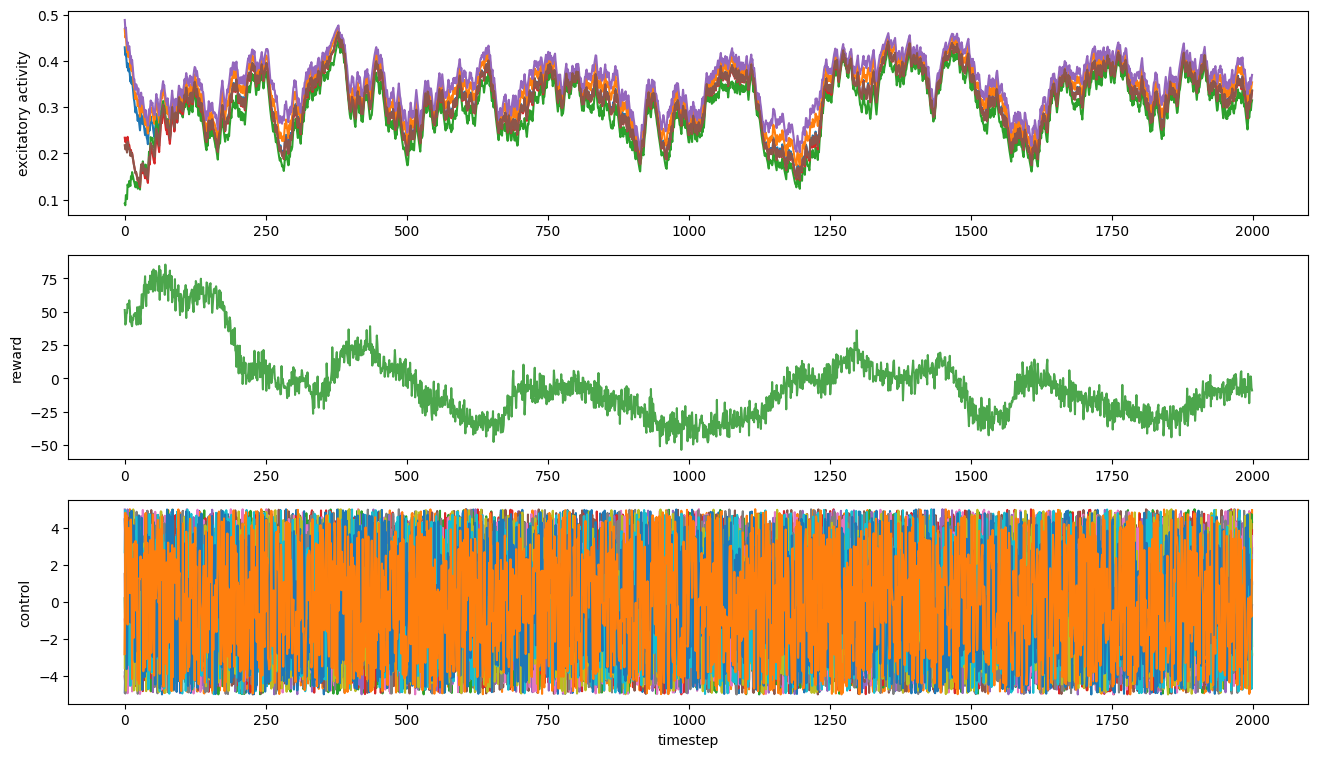

In [5]:
plt.figure(figsize=(16, 9))
plt.subplot(311)
plt.plot(excs)
#plt.plot(inhs, label='inhibitory activity')
plt.ylabel('excitatory activity')
plt.subplot(312)
plt.plot(rewards, c='g', alpha=0.7, label='reward')
plt.ylabel('reward')
plt.subplot(313)
plt.plot(actions.reshape((actions.shape[0], -1)))
plt.ylabel('control')
plt.xlabel('timestep')

# Periodic Input Agent

In [6]:
observation, info = env.reset()

observations = []
rewards = []
actions = []

periodic_node_control = np.sin(2 * np.pi * env.unwrapped.oscillation_freq * np.linspace(0, env.unwrapped.duration, env.unwrapped.n_steps))
periodic_control = np.repeat(periodic_node_control[:, np.newaxis], 6, axis=1).T

while True:
    action = (periodic_control[:, env.unwrapped.t_i], periodic_control[:, env.unwrapped.t_i])
    observation, reward, terminated, truncated, info = env.step(action)
    observations.append(observation)
    rewards.append(reward)
    actions.append(action)
    
    if terminated or truncated:
        observation, info = env.reset()
        break

excs = np.array([obs["exc"][:, -1] for obs in observations])
inhs = np.array([obs["inh"][:, -1] for obs in observations])
actions = np.array(actions)
rewards = np.array(rewards)

In [7]:
rewards.sum()

262574.1671965559

Text(0.5, 0, 'timestep')

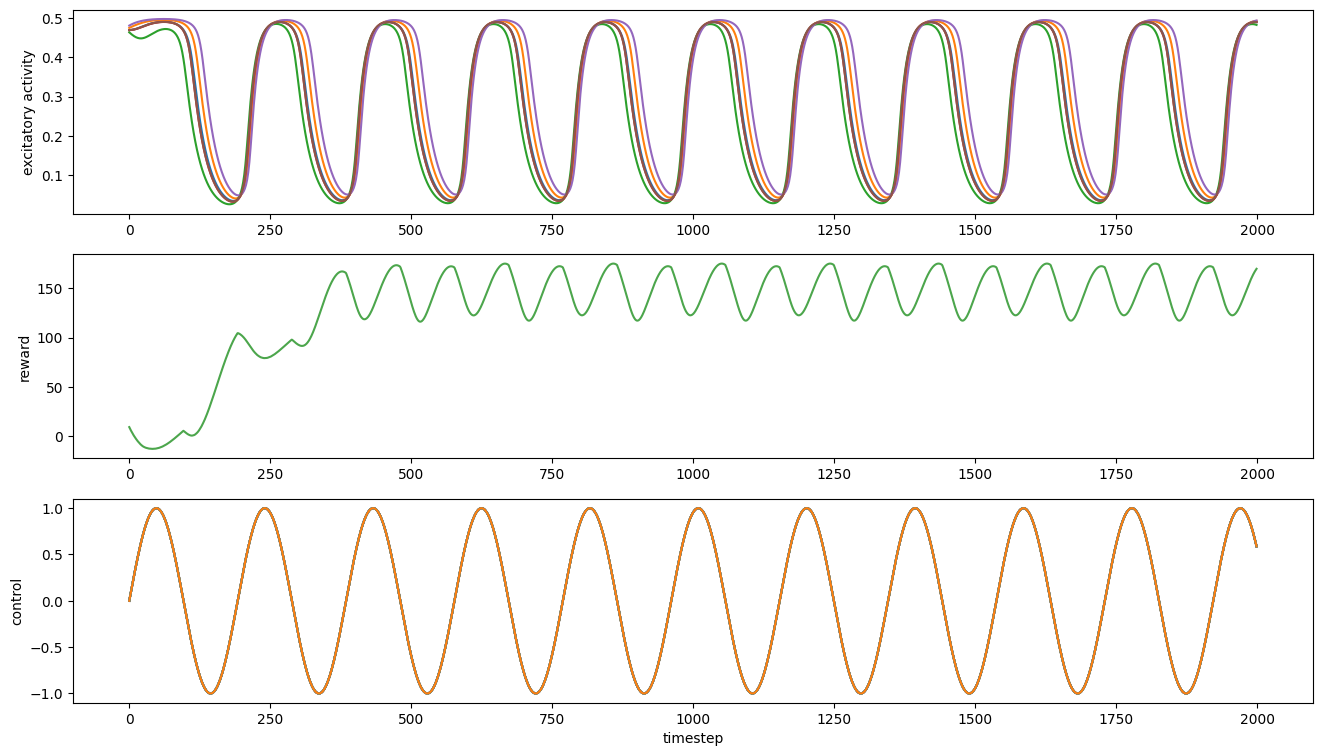

In [8]:
plt.figure(figsize=(16, 9))
plt.subplot(311)
plt.plot(excs)
#plt.plot(inhs, label='inhibitory activity')
plt.ylabel('excitatory activity')
plt.subplot(312)
plt.plot(rewards, c='g', alpha=0.7, label='reward')
plt.ylabel('reward')
plt.subplot(313)
plt.plot(actions.reshape((actions.shape[0], -1)))
plt.ylabel('control')
plt.xlabel('timestep')

# Desynchronization Task

In [9]:
env = gymnasium.make('Synchronization-v0', target='desync')

In [10]:
observation, info = env.reset()

observations = []
rewards = []
actions = []

while True:
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)
    observations.append(observation)
    rewards.append(reward)
    actions.append(action)
    
    if terminated or truncated:
        observation, info = env.reset()
        break

excs = np.array([obs["exc"][:, -1] for obs in observations])
inhs = np.array([obs["inh"][:, -1] for obs in observations])
actions = np.array(actions)
rewards = np.array(rewards)

In [11]:
rewards.sum()

-139238.6268788446

Text(0.5, 0, 'timestep')

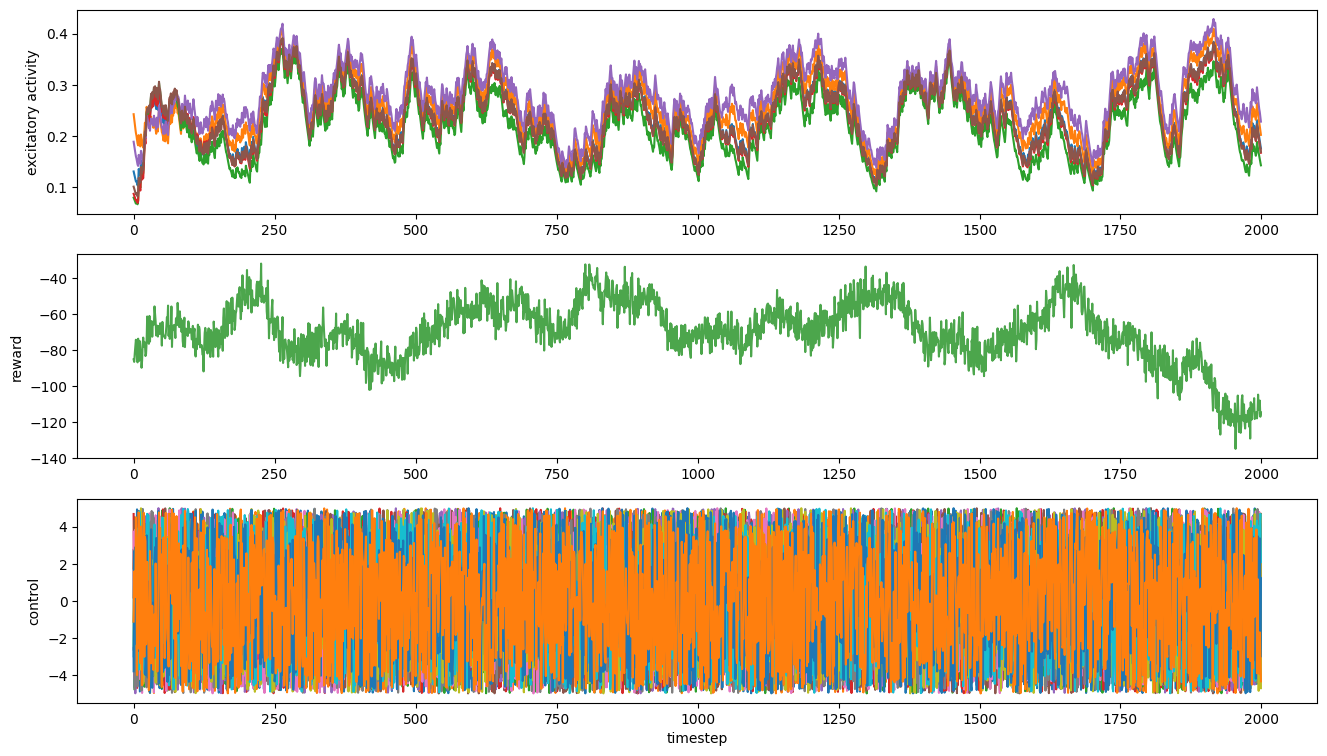

In [12]:
plt.figure(figsize=(16, 9))
plt.subplot(311)
plt.plot(excs)
#plt.plot(inhs, label='inhibitory activity')
plt.ylabel('excitatory activity')
plt.subplot(312)
plt.plot(rewards, c='g', alpha=0.7, label='reward')
plt.ylabel('reward')
plt.subplot(313)
plt.plot(actions.reshape((actions.shape[0], -1)))
plt.ylabel('control')
plt.xlabel('timestep')